In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [235]:
dt = 0.02
kp = 5
ki = 100
kd = 0.05

def calculate_pid(current, target, pid_i, prev_error):
    error = target - current
    pid_p = kp * error
    delta_error = error - prev_error
    if abs(delta_error) < 1:
        pid_i += ki * error * dt
    else:
        pid_i = 0
    pid_d = kd * delta_error / dt

    pid = pid_p + pid_i + pid_d

    return pid, pid_i, pid_d, error

In [236]:
# target = 10
targets = [10, 50, 25, 50, 60, 0, 80]
current = 0
pid_i = 0
error = 0

data = []

for i in range(1000):
    if i%100 == 0:
        idx = i // 100
        idx %= len(targets)
        target = targets[idx]
    
    _current, pid_i, pid_d, error = calculate_pid(current, target, pid_i, error)
    # for inertia
    current += _current * 0.04
    data.append([target, current, pid_i, pid_d, error])
data = np.array(data)

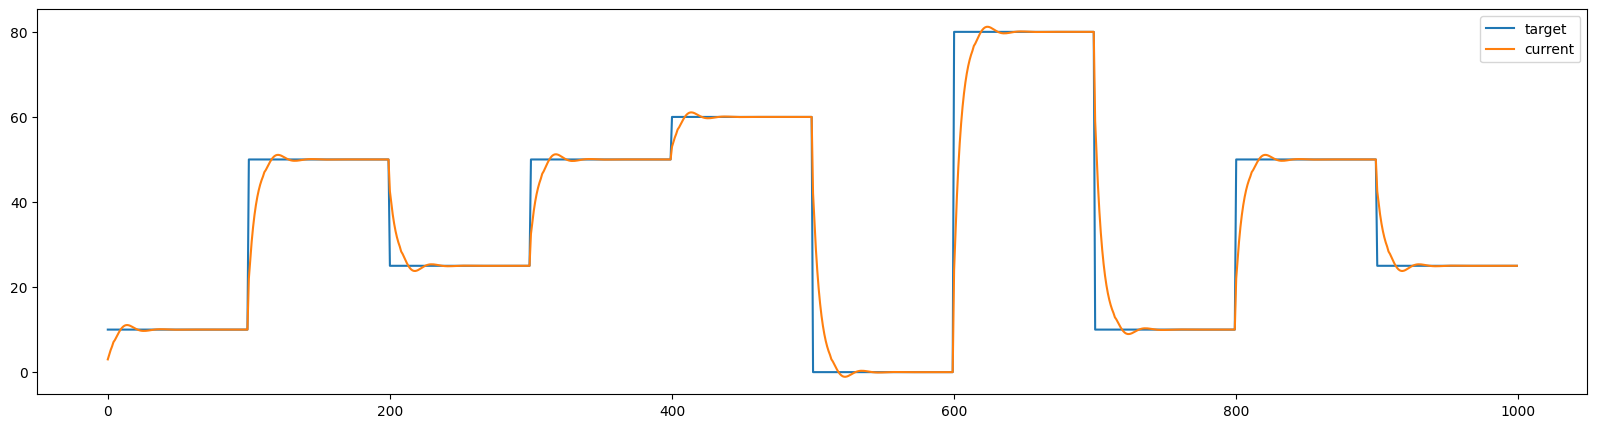

In [238]:
_data = data#[480:550]
plot_data = [
    [_data[:, 0], 'target'],
    [_data[:, 1], 'current'],
    # [_data[:, 2], 'pid_i'],
    # [_data[:, 3], 'pid_d'],
    # [_data[:, 4], 'error'],
]
plt.figure(figsize=(20, 5))
# plt.plot(_data[:, 0])
# plt.plot(_data[:, 1])
# plt.plot(_data[:, 2])
# plt.plot(_data[:, 3])
# plt.plot(_data[:, 4])
# plt.legend(['target', 'curent', 'pid_i', 'pid_d', 'error'])
for d, _ in plot_data:
    plt.plot(d)
plt.legend([p[1] for p in plot_data])
plt.show()